In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [6]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [10]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


## 1.What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [14]:
category_counts = df['category'].value_counts()
category_counts.head(10)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64

In [18]:
category_counts = df['category'].value_counts()
category_counts.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

C:\Users\Javier Soto\AppData\Local\Temp\ipykernel_29496\4088557833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.head(10).index, y=category_counts.head(10).values, palette='viridis')


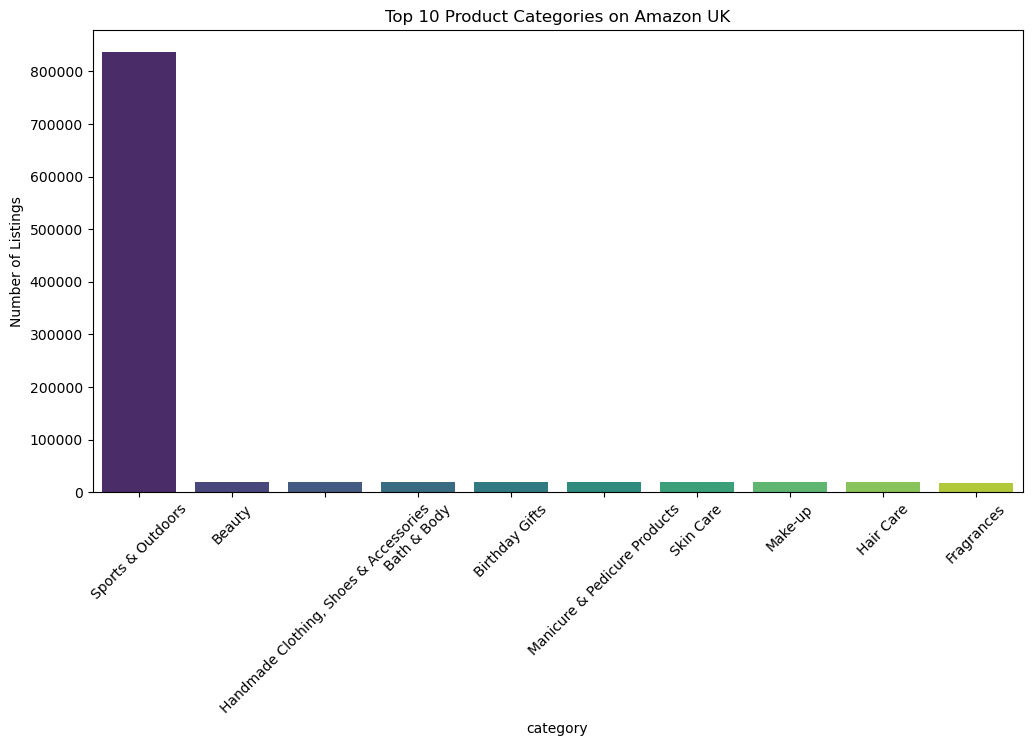

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.head(10).index, y=category_counts.head(10).values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Product Categories on Amazon UK")
plt.ylabel("Number of Listings")
plt.show()



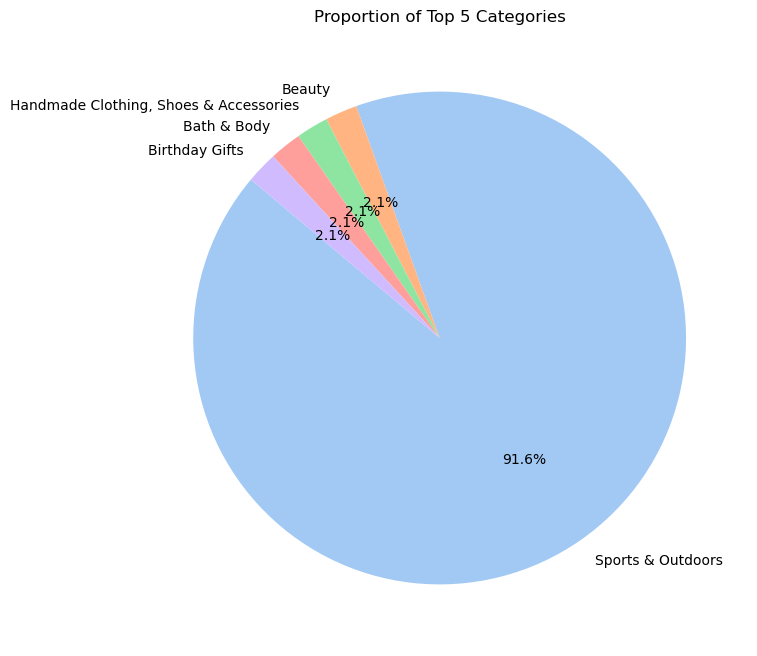

In [16]:
top5 = category_counts.head(5)
plt.figure(figsize=(8,8))
plt.pie(top5.values, labels=top5.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Proportion of Top 5 Categories")
plt.show()


La categoría que domina las ventas en los productos de Amazon es 'Sports & Outdoors' llevándose el 92% de las ventas dentro del top 5 categorías de productos de Amazon.

## 2. How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [21]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price


(np.float64(89.24380943923663), 19.09, np.float64(9.99))

Aunque el precio medio de los productos se sitúa en torno a los 90 £, lo que indica que algunos productos de mayor valor elevan significativamente la media, el precio mediano entre los consumidores es mucho más bajo, alrededor de 19 £. Esto significa que la mitad de los consumidores paga menos de 19 £ y la otra mitad paga más. Aun así, el precio que aparece con mayor frecuencia, es decir, el más popular entre los compradores, sigue siendo el clásico 9,99 £, lo que refleja la fuerte presencia de productos de bajo coste dentro del mercado.



In [22]:
price_var = df['price'].var()
price_std = df['price'].std()
price_range = df['price'].max() - df['price'].min()
price_iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)

price_var, price_std, price_range, price_iqr


(119445.48532256528, 345.60886175352226, 100000.0, np.float64(36.0))

Los productos en Amazon UK muestra que existe una gran variabilidad en los precios mostradas en la varianza de 119.445 y la desviación estándar de 345 £, lo que indica que los precios se dispersan significativamente respecto a la media, debido a la presencia de productos extremadamente caros que elevan los valores promedio, aunque la mayoría de los productos tiene precios más moderados. El rango total de precios es de 100.000 £, confirmando la existencia de artículos de lujo o de nicho mucho más caros que el resto. Sin embargo, la mitad central de los productos, se encuentra en solo 36 £, lo que sugiere que la mayoría de los productos se concentran en un rango de precios similar. 

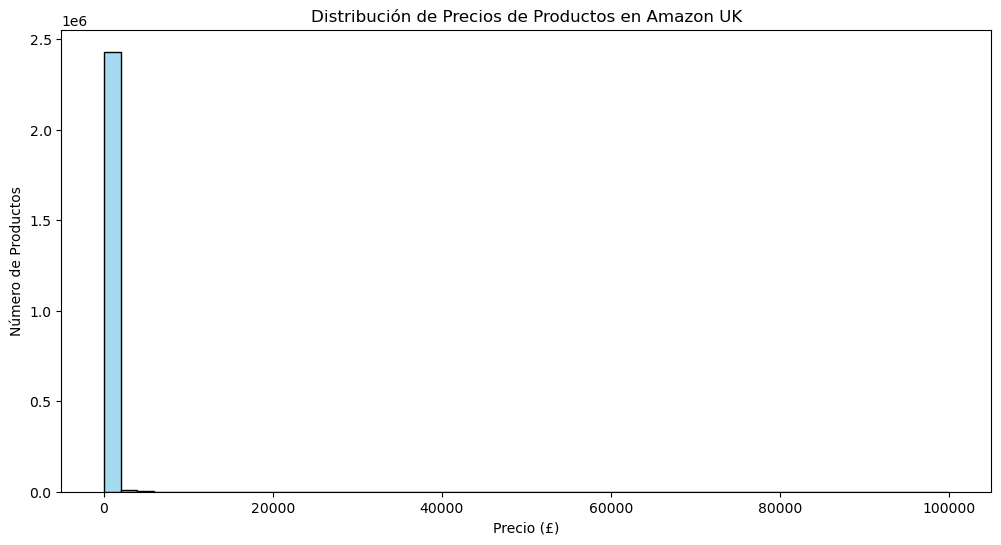

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(df['price'], bins=50, kde=False, color='skyblue')
plt.title("Distribución de Precios de Productos en Amazon UK")
plt.xlabel("Precio (£)")
plt.ylabel("Número de Productos")
plt.show()


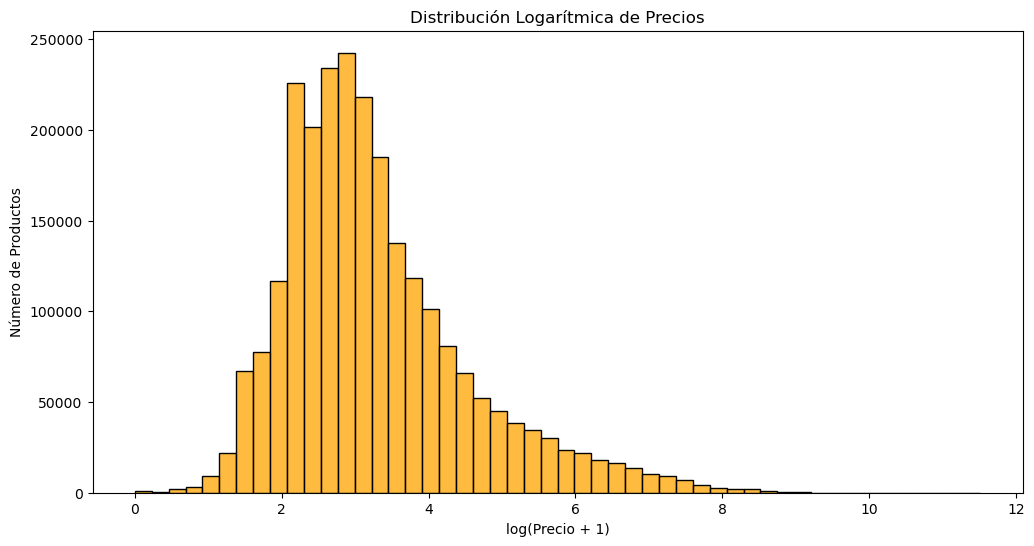

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(np.log1p(df['price']), bins=50, kde=False, color='orange')
plt.title("Distribución Logarítmica de Precios")
plt.xlabel("log(Precio + 1)")
plt.ylabel("Número de Productos")
plt.show()


Para ver mejor los datos he aplicado una escala logarítmica para comprimir los extremos y ver mejor la distribución de la mayoría de productos.

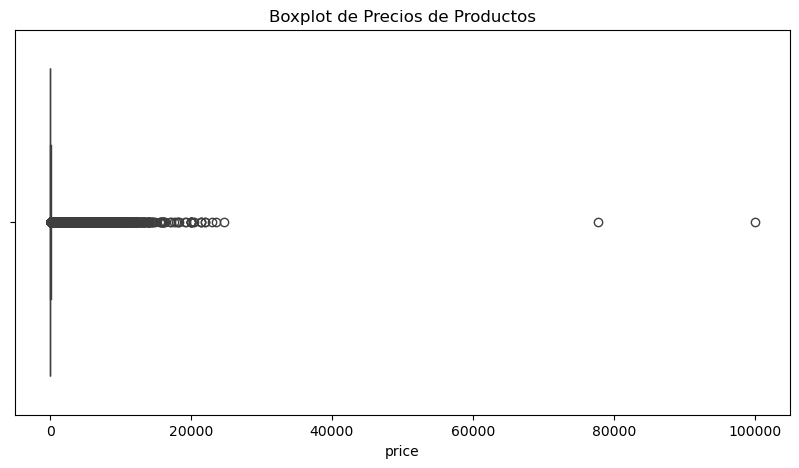

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])
plt.title("Boxplot de Precios de Productos")
plt.show()


El boxplot de precios de productos revela claramente la presencia de outliers. La mayoría de los precios se concentran en un rango bajo, como lo indica la caja central del gráfico. Sin embargo, se observan varios puntos individuales que se encuentran fuera de los límites de los bigotes, especialmente en valores cercanos a 80.000 y 100.000.

## 3.How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [28]:
valid_stars = df[df['stars'] > 0]['stars']

mean_stars = valid_stars.mean()
median_stars = valid_stars.median()
mode_stars = valid_stars.mode()[0]

mean_stars, median_stars, mode_stars



(np.float64(4.31916076222691), 4.4, np.float64(4.5))

In [29]:
stars_var = valid_stars.var()
stars_std = valid_stars.std()
stars_iqr = valid_stars.quantile(0.75) - valid_stars.quantile(0.25)

stars_var, stars_std, stars_iqr


(0.3083433752380519, 0.5552867504614637, np.float64(0.5))

In [30]:
stars_skew = valid_stars.skew()
stars_kurtosis = valid_stars.kurtosis()

stars_skew, stars_kurtosis


(np.float64(-2.3795681122127945), np.float64(9.78193769066435))

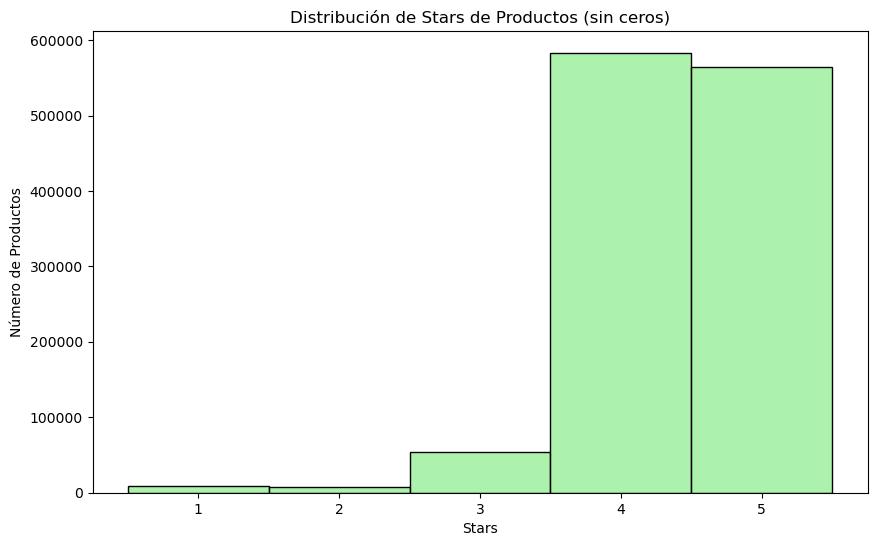

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(valid_stars, bins=5, kde=False, color='lightgreen', discrete=True)
plt.title("Distribución de Stars de Productos (sin ceros)")
plt.xlabel("Stars")
plt.ylabel("Número de Productos")
plt.show()


El análisis de las calificaciones de productos en Amazon UK muestra que la mayoría de los productos son bien valorados, con una media de aproximadamente 4.32 estrellas, una mediana de 4.4 y una moda de 4.5. La varianza y la desviación estándar bajas, junto con un IQR de 0.5, indican que las calificaciones son consistentes y la mayoría de los productos se concentran en la franja alta de 4–4.5 estrellas. La distribución es sesgada hacia valores altos y presenta un pico pronunciado, confirmando que los clientes tienden a dar ratings positivos y que solo un pequeño número de productos recibe calificaciones bajas. Esto sugiere que los productos generalmente mantienen un estándar de calidad uniforme y que resaltar los artículos con 5 estrellas puede ser especialmente efectivo en estrategias de marketing, mientras que los productos sin ratings representan oportunidades para incentivar la retroalimentación y mejorar la visibilidad.